In [1]:
import numpy as np

###############################################################################
# 1) Store parameter sets for WT and ST3Gal4–/– in separate dictionaries.
###############################################################################

def get_parameters_WT():
    """
    Returns a dictionary of all x_i parameters for the WT model,
    including the enforced values x7=x8=x9=x10=2.5, x16=0.0084,
    x20=x18, x21=x19.
    """
    p = {}
    # From the table (WT)
    p['x1']  = 16.3036
    p['x2']  = 23.6605
    p['x3']  = 8.0636
    p['x4']  = 14.8590
    p['x5']  = 31.0464
    p['x6']  = -0.2266
    p['x11'] = 19.6572
    p['x12'] = 0.0136
    p['x13'] = 28.3559
    p['x14'] = 0.0139
    p['x15'] = 28.6912
    p['x17'] = 12.3515
    p['x18'] = 0.33553
    p['x19'] = 4363.6      # 4.3636e3
    p['x22'] = 13.2674
    p['x23'] = 7.2958
    p['x24'] = 7.2504
    p['x25'] = 7.5708
    # Enforced values
    p['x7']  = 2.5
    p['x8']  = 2.5
    p['x9']  = 2.5
    p['x10'] = 2.5
    p['x16'] = p['x14']
    # x20 = x18, x21 = x19
    p['x20'] = p['x18']
    p['x21'] = p['x19']
    return p


def get_parameters_KO():
    """
    Returns a dictionary of all x_i parameters for the ST3Gal4–/– model,
    including the enforced values x7=x8=x9=x10=2.5, x16=0.0084,
    x20=x18, x21=x19.
    """
    p = {}
    # From the table (ST3Gal4–/–)
    p['x1']  = 38.9756
    p['x2']  = 27.6129
    p['x3']  = 8.2235
    p['x4']  = 10.7454
    p['x5']  = 25.6248
    p['x6']  = -6.6274
    p['x11'] = 17.0064
    p['x12'] = 0.0130
    p['x13'] = 31.8518
    p['x14'] = 0.0125
    p['x15'] = 29.3783
    p['x17'] = 16.9279
    p['x18'] = 0.84621
    p['x19'] = 7427.0      # 7.4270e3
    p['x22'] = 13.4213
    p['x23'] = 7.1823
    p['x24'] = 7.1504
    p['x25'] = 6.4955
    # Enforced values
    p['x7']  = 2.5
    p['x8']  = 2.5
    p['x9']  = 2.5
    p['x10'] = 2.5
    p['x16'] = p['x14']
    # x20 = x18, x21 = x19
    p['x20'] = p['x18']
    p['x21'] = p['x19']
    return p


In [2]:
# the B-model
def get_parameters_custom():
    """
    Returns a dictionary of all x_i parameters for a custom model,
    including the enforced values x1~x10=2.5, x16=0.0084,
    x20=x18, x21=x19.
    """
    p = {}
    # Custom-defined values
    p['x1']  = 2.5
    p['x2']  = 2.5
    p['x3']  = 2.5
    p['x4']  = 2.5
    p['x5']  = 2.5
    p['x6']  = 2.5
    p['x7']  = 2.5
    p['x8']  = 2.5
    p['x9']  = 2.5
    p['x10'] = 2.5
    p['x11'] = 7
    p['x12'] = 0.0084
    p['x13'] = 7
    p['x14'] = 0.0084
    p['x15'] = 7
    p['x16'] = 0.0084  
    p['x17'] = 7
    p['x18'] = 0.001
    p['x19'] = 0.02
    p['x20'] = 1/95000
    p['x21'] = 0.02
    p['x22'] = 16.6
    p['x23'] = 7.7
    p['x24'] = 7.7
    p['x25'] = 7.7
    return p


In [3]:

###############################################################################
# 2) Define the alpha_ij(V) and beta_ij(V) functions using the param dict.
###############################################################################

def get_transition_rates(V, p):
    """
    Given a voltage V and a parameter dictionary p (either WT or KO),
    compute all alpha_ij and beta_ij and return them in a dict r.
    
    The naming matches the figure and the formulae in your description:
      alpha_11, beta_11, alpha_12, beta_12, alpha_13, beta_13,
      alpha_111, alpha_112, beta_111, beta_112,
      alpha_31, beta_31, alpha_32, beta_32,
      alpha_33, beta_33,
      alpha_2, beta_2, alpha_4, beta_4, alpha_5, beta_5.
    """
    
    # For brevity in the code
    x1  = p['x1'];   x2  = p['x2'];   x3  = p['x3'];   x4  = p['x4']
    x5  = p['x5'];   x6  = p['x6'];   x7  = p['x7'];   x8  = p['x8']
    x9  = p['x9'];   x10 = p['x10'];  x11 = p['x11'];  x12 = p['x12']
    x13 = p['x13'];  x14 = p['x14'];  x15 = p['x15'];  x16 = p['x16']
    x17 = p['x17'];  x18 = p['x18'];  x19 = p['x19'];  x20 = p['x20']
    x21 = p['x21'];  x22 = p['x22'];  x23 = p['x23'];  x24 = p['x24']
    x25 = p['x25']

    # Define alpha_11, beta_11, etc. exactly as in the table:
    alpha_11  = 3.802 * ( 0.1027*np.exp(-(V + x1)/17.0) + 0.20*np.exp(-(V + x1)/150.0) )**(-1)
    beta_11   = 0.1917*np.exp(-(V + x2)/20.3)

    alpha_12  = 3.802 * ( 0.1027*np.exp(-(V + x3)/15.0) + 0.23*np.exp(-(V + x3)/150.0) )**(-1)
    beta_12   = 0.20*np.exp(-(V + x4)/20.3)

    alpha_13  = 3.802 * ( 0.1027*np.exp(-(V + x5)/12.0) + 0.25*np.exp(-(V + x5)/150.0) )**(-1)
    beta_13   = 0.22*np.exp(-(V + x6)/20.3)

    alpha_111 = 3.802 * ( 0.1027*np.exp(-(V + x7)/17.0) + 0.20*np.exp(-(V + x7)/150.0) )**(-1)
    alpha_112 = 3.802 * ( 0.1027*np.exp(-(V + x8)/15.0) + 0.23*np.exp(-(V + x8)/150.0) )**(-1)
    beta_111  = 0.1917*np.exp(-(V + x9)/20.3)
    beta_112  = 0.20*np.exp(-(V + x10)/20.3)

    alpha_31  = 7.0e-7 * np.exp(-(V + x11)/x23)
    beta_31   = x12 + 2.0e-5*(V + 7.0)

    alpha_32  = 7.0e-7 * np.exp(-(V + x13)/x24)
    beta_32   = x14 + 2.0e-5*(V + 7.0)

    alpha_33  = 7.0e-7 * np.exp(-(V + x15)/x25)
    beta_33   = x16 + 2.0e-5*(V + 7.0)

    # alpha_2, beta_2 (with the extra piece of function inside exponent)
    # The expression given in your table is 0.188495 * exp( -((V+x17)/x22) + 0.393956 )
    # Pay attention to parentheses:
    alpha_2   = 0.188495 * np.exp( -( (V + x17)/x22 ) + 0.393956 )

    # beta_2 = alpha_13 * alpha_2 * alpha_33 / (beta_13 * beta_33)
    beta_2    = alpha_13 * alpha_2 * alpha_33 / (beta_13 * beta_33)

    # alpha_4 = x18 * alpha_2
    alpha_4   = x18 * alpha_2
    # beta_4  = x19 * alpha_33
    beta_4    = x19 * alpha_33

    # alpha_5 = x20 * alpha_33   but x20 = x18
    alpha_5   = x20 * alpha_33
    # beta_5  = x21 * alpha_33   but x21 = x19
    beta_5    = x21 * alpha_33

    # Bundle all these into a dictionary
    r = {}
    r['alpha_11']  = alpha_11
    r['beta_11']   = beta_11
    r['alpha_12']  = alpha_12
    r['beta_12']   = beta_12
    r['alpha_13']  = alpha_13
    r['beta_13']   = beta_13
    r['alpha_111'] = alpha_111
    r['alpha_112'] = alpha_112
    r['beta_111']  = beta_111
    r['beta_112']  = beta_112
    r['alpha_31']  = alpha_31
    r['beta_31']   = beta_31
    r['alpha_32']  = alpha_32
    r['beta_32']   = beta_32
    r['alpha_33']  = alpha_33
    r['beta_33']   = beta_33
    r['alpha_2']   = alpha_2
    r['beta_2']    = beta_2
    r['alpha_4']   = alpha_4
    r['beta_4']    = beta_4
    r['alpha_5']   = alpha_5
    r['beta_5']    = beta_5
    return r

###############################################################################
# 3) Build the 9×9 generator matrix A from the rates.  We number states as:
#    0=IC3, 1=IC2, 2=IF, 3=I1, 4=I2, 5=C3, 6=C2, 7=C1, 8=O
#
#   A[i,i] = - sum_of_all_outgoing_rates_from_state_i
#   A[j,i] = + rate from i->j, for j != i
###############################################################################

def build_generator_matrix(r):
    """
    Given the dict r of rate constants, build the 9×9 Q-matrix (generator).
    State ordering:
       0: IC3
       1: IC2
       2: IF
       3: I1
       4: I2
       5: C3
       6: C2
       7: C1
       8: O
    """
    A = np.zeros((9,9), dtype=np.float64)

    # For readability, pull out each alpha/beta we need:
    a11 = r['alpha_11'];   b11 = r['beta_11']
    a12 = r['alpha_12'];   b12 = r['beta_12']
    a13 = r['alpha_13'];   b13 = r['beta_13']
    a111= r['alpha_111'];  b111= r['beta_111']
    a112= r['alpha_112'];  b112= r['beta_112']
    a31 = r['alpha_31'];   b31 = r['beta_31']
    a32 = r['alpha_32'];   b32 = r['beta_32']
    a33 = r['alpha_33'];   b33 = r['beta_33']
    a2  = r['alpha_2'];    b2  = r['beta_2']
    a4  = r['alpha_4'];    b4  = r['beta_4']
    a5  = r['alpha_5'];    b5  = r['beta_5']

    # 0 = IC3
    # out: IC3 -> IC2 (a111), IC3 -> C3 (a31)
    A[0,0] = - (a111 + a31)
    # in : IC2 -> IC3 (b111), C3 -> IC3 (b31)
    A[0,1] = b111
    A[0,5] = b31

    # 1 = IC2
    # out: IC2 -> IC3 (b111), IC2 -> IF (a112), IC2 -> C2 (a32)
    A[1,1] = - (b111 + a112 + a32)
    # in : IC3 -> IC2 (a111), IF -> IC2 (b112), C2 -> IC2 (b32)
    A[1,0] = a111
    A[1,2] = b112
    A[1,6] = b32

    # 2 = IF
    # out: IF -> IC2 (b112), IF -> I1 (a4), IF -> C1 (a33)
    A[2,2] = - (b112 + a4 + a33 +b2)
    # in : IC2 -> IF (a112), I1 -> IF (b4), C1 -> IF (b33)
    A[2,1] = a112
    A[2,3] = b4
    A[2,7] = b33
    A[2,8] = a2

    # 3 = I1
    # out: I1 -> IF (b4), I1 -> I2 (a5)
    A[3,3] = - (b4 + a5)
    # in : IF -> I1 (a4), I2 -> I1 (b5)
    A[3,2] = a4
    A[3,4] = b5

    # 4 = I2
    # out: I2 -> I1 (b5)
    A[4,4] = - b5
    # in : I1 -> I2 (a5)
    A[4,3] = a5

    # 5 = C3
    # out: C3 -> IC3 (b31), C3 -> C2 (a11)
    A[5,5] = - (b31 + a11)
    # in : IC3 -> C3 (a31), C2 -> C3 (b11)
    A[5,0] = a31
    A[5,6] = b11

    # 6 = C2
    # out: C2 -> C3 (b11), C2 -> IC2 (b32), C2 -> C1 (a12)
    # (If your diagram shows C2->IF as well, add it, but the text uses alpha_112 only for IC2->IF.)
    A[6,6] = - (b11 + b32 + a12)
    # in : C3 -> C2 (a11), IC2 -> C2 (a32), C1 -> C2 (b12)
    A[6,5] = a11
    A[6,1] = a32
    A[6,7] = b12

    # 7 = C1
    # out: C1 -> C2 (b12), C1 -> O (a13), C1 -> IF (b33) ??? Actually from the figure it's C1->IF=alpha33
    A[7,7] = - (b12 + a13 + b33)
   
    A[7,6] = a12  # from C2->C1
    A[7,8] = b13  # from O->C1
    A[7,2] = a33

    # 8 = O
    A[8,7] = a13  # from C1->O
    A[8,3] = b2   # from I1->O

    return A

###############################################################################
# 4) Solve for the stationary distribution: A^T pi = 0, sum_i pi_i = 1
###############################################################################

def compute_stationary_distribution(A):
    """
    Solve A^T pi = 0 with sum(pi)=1 for the row vector pi.
    Returns pi as a 1D numpy array of length 9.
    """
    # One standard way: solve the linear system A^T pi = 0, sum(pi)=1.
    # We can do this by replacing one of the equations by the normalization
    # constraint. For instance, replace the last row of A^T with 1's.
    # Then the RHS is [0,0,0,0,0,0,0,0,1].
    
    # We'll work with A^T:
    AT = A.T.copy()
    b = np.zeros(9, dtype=np.float64)
    # Replace last row by [1,1,...,1], b_last=1
    AT[8,:] = 1.0
    b[8] = 1.0

    # Solve
    pi = np.linalg.solve(AT, b)
    return pi
import numpy as np

###############################################################################
# 5) Put it all together: a function that, given V and either WT or KO params,
#    returns the 9-state stationary distribution.
###############################################################################

def get_stationary_distribution(V, param_dict):
    """
    High-level function:
      1) Compute all transition rates at voltage V using param_dict.
      2) Build the generator matrix A.
      3) Solve for and return the stationary distribution (length-9 array).
    """
    rates = get_transition_rates(V, param_dict)
    A = build_generator_matrix(rates)
    pi = np.round(compute_stationary_distribution(A),3)
    return pi



In [4]:
###############################################################################
# Example usage:
###############################################################################

if __name__ == "__main__":

    # Load WT and KO parameter sets
    p_WT = get_parameters_WT()
    p_KO = get_parameters_KO()

    # Pick a test voltage, say V=0
    V_test = -130

    # Compute stationary distributions
    pi_WT = get_stationary_distribution(V_test, p_WT)
    pi_KO = get_stationary_distribution(V_test, p_KO)

    print("WT stationary distribution at V=0 mV:")
    print(pi_WT)
    print("\nKO stationary distribution at V=0 mV:")
    print(pi_KO)


WT stationary distribution at V=0 mV:
[0.11  0.11  0.107 0.107 0.107 0.11  0.11  0.11  0.126]

KO stationary distribution at V=0 mV:
[0.111 0.111 0.098 0.098 0.098 0.111 0.111 0.111 0.151]


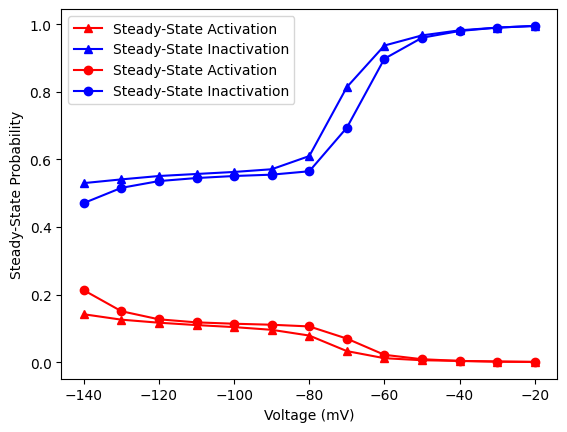

In [5]:
import numpy as np
import matplotlib.pyplot as plt

voltages = np.arange(-140, -20+1, 10)
ssa = []
ssi = []
ssa1 = []
ssi1 = []
p_B = get_parameters_custom()
for V in voltages:
    pi = get_stationary_distribution(V, p_WT)  # your Markov function
    # Suppose index 8 = O, 0..4 = inactivated states, etc.:
    pO      = pi[8]
    pIC3    = pi[0]
    pIC2    = pi[1]
    pIF     = pi[2]
    pI1     = pi[3]
    pI2     = pi[4]
    
    # Activation = fraction in open state
    ssa.append(pO)
    
    # Inactivation = sum of inactivated states (or 1 minus that, depending on definition)
    ssi_value = (pIC3 + pIC2 + pIF + pI1 + pI2)
    ssi.append(ssi_value)
    
    pi1 = get_stationary_distribution(V, p_KO)  # your Markov function
    # Suppose index 8 = O, 0..4 = inactivated states, etc.:
    pO1      = pi1[8]
    pIC31    = pi1[0]
    pIC21    = pi1[1]
    pIF1     = pi1[2]
    pI11     = pi1[3]
    pI21     = pi1[4]
    
    # Activation = fraction in open state
    ssa1.append(pO1)
    
    # Inactivation = sum of inactivated states (or 1 minus that, depending on definition)
    ssi_value1 = (pIC31+ pIC21 + pIF1 + pI11 + pI21)
    ssi1.append(ssi_value1)
# Then plot
plt.figure()
plt.plot(voltages, ssa, 'r-^', label='Steady-State Activation')
plt.plot(voltages, ssi, 'b-^', label='Steady-State Inactivation')
plt.xlabel('Voltage (mV)')
plt.ylabel('Steady-State Probability')
plt.legend()

plt.plot(voltages, ssa1, 'r-o', label='Steady-State Activation')
plt.plot(voltages, ssi1, 'b-o', label='Steady-State Inactivation')
plt.xlabel('Voltage (mV)')
plt.ylabel('Steady-State Probability')
plt.legend()
plt.show()


In [6]:
def get_parameters_WT_levels():
    """
    Returns a dictionary with the guess ranges (lower and upper bounds) for each of the 25 parameters
    in the WT model. The ranges are set at ±20% of the nominal value from get_parameters_WT().
    
    For each parameter x_i, if the nominal value is v:
      - If v >= 0, lower bound = 0.8 * v, upper bound = 1.2 * v.
      - If v < 0, lower bound = 1.2 * v (more negative), upper bound = 0.8 * v.
      
    This provides the two levels for a full- or fractional-factorial experimental design.
    """
    p = get_parameters_WT()
    levels = {}
    for key, val in p.items():
        if val >= 0:
            low = val * 0.5
            high = val * 1.5
        else:
            # For negative numbers, multiplying by 1.2 makes the value more negative.
            low = val * 1.5
            high = val * 0.5
        levels[key] = (low, high)
    return levels

# Example usage:
if __name__ == '__main__':
    wt_levels = get_parameters_WT_levels()
    for key in sorted(wt_levels.keys()):
        print(f"{key}: lower = {wt_levels[key][0]:.4f}, upper = {wt_levels[key][1]:.4f}")


x1: lower = 8.1518, upper = 24.4554
x10: lower = 1.2500, upper = 3.7500
x11: lower = 9.8286, upper = 29.4858
x12: lower = 0.0068, upper = 0.0204
x13: lower = 14.1779, upper = 42.5339
x14: lower = 0.0069, upper = 0.0209
x15: lower = 14.3456, upper = 43.0368
x16: lower = 0.0069, upper = 0.0209
x17: lower = 6.1757, upper = 18.5272
x18: lower = 0.1678, upper = 0.5033
x19: lower = 2181.8000, upper = 6545.4000
x2: lower = 11.8302, upper = 35.4907
x20: lower = 0.1678, upper = 0.5033
x21: lower = 2181.8000, upper = 6545.4000
x22: lower = 6.6337, upper = 19.9011
x23: lower = 3.6479, upper = 10.9437
x24: lower = 3.6252, upper = 10.8756
x25: lower = 3.7854, upper = 11.3562
x3: lower = 4.0318, upper = 12.0954
x4: lower = 7.4295, upper = 22.2885
x5: lower = 15.5232, upper = 46.5696
x6: lower = -0.3399, upper = -0.1133
x7: lower = 1.2500, upper = 3.7500
x8: lower = 1.2500, upper = 3.7500
x9: lower = 1.2500, upper = 3.7500


In [7]:
# def generate_fractional_factorial_design(n_runs, param_names, levels):
#     """
#     For each run, for each parameter, randomly assign -1 or +1,
#     then pick the corresponding (low, high) from 'levels'.
    
#     Returns a list of dicts. Each dict has parameter: value for that run.
#     Also returns a parallel list of "sign assignments" for effect calculations.
#       sign_assign[i][param] = -1 or +1
#     """
#     design_candidates = []
#     sign_assign = []
#     for i in range(n_runs):
#         candidate = {}
#         candidate_signs = {}
#         for key in param_names:
#             low, high = levels[key]
#             chosen_sign = np.random.choice([-1, 1])
#             candidate_signs[key] = chosen_sign
#             candidate[key] = low if chosen_sign == -1 else high
#         design_candidates.append(candidate)
#         sign_assign.append(candidate_signs)
#     return design_candidates, sign_assign

###############################################################################
# 3) Suppose we have a function to compute the discrepancy vs nominal
###############################################################################

def compute_discrepancy(p_candidate, p_nominal, voltages):
    """
    For each voltage, get stationary distribution for candidate vs nominal,
    measure difference in SSA & SSI, sum absolute differences.
    
    We'll define:
      SSA = probability of open state (index 8)
      SSI = 1 - sum of states [0..4]
    """
    discrepancy = 0.0
    for V in voltages:
        pi_cand = get_stationary_distribution(V, p_candidate)
        pi_nom  = get_stationary_distribution(V, p_nominal)
        # ssa
        ssa_cand = pi_cand[8]
        ssa_nom  = pi_nom[8]
        # ssi
        ssi_cand = np.sum(pi_cand[0:5])
        ssi_nom  = np.sum(pi_nom[0:5])
        
        discrepancy += abs(ssa_cand - ssa_nom) + abs(ssi_cand - ssi_nom)
    return discrepancy

###############################################################################
# 4) Compute factor effects:
#    beta_i = 1/2 [ average discrepancy( x_i=+1 ) - average discrepancy( x_i=-1 ) ]
###############################################################################

def compute_factor_effects(param_names, sign_assign, discrepancies):
    """
    param_names : list of parameter names
    sign_assign : list of dicts, sign_assign[i][param] = -1 or +1 for that run
    discrepancies: array of shape (n_runs,), the discrepancy for each run
    
    Returns a dict: param -> effect
    """
    n_runs = len(discrepancies)
    effects = {}
    for param in param_names:
        # gather discrepancy for runs where param=+1, param=-1
        disc_plus = []
        disc_minus = []
        for i in range(n_runs):
            s = sign_assign[i][param]
            if s == +1:
                disc_plus.append(discrepancies[i])
            else:
                disc_minus.append(discrepancies[i])
        # compute average
        mean_plus = np.mean(disc_plus)
        mean_minus = np.mean(disc_minus)
        # effect
        effect = 0.5 * (mean_plus - mean_minus)
        effects[param] = effect
    return effects

In [8]:
# # (A) Get nominal parameters and levels
# p_nominal = get_parameters_WT()
# levels = get_parameters_WT_levels()
# param_names = list(p_nominal.keys())

# # (B) Create a random 2-level design with e.g. 32 runs
# n_runs = 10000
# design_candidates, sign_assign = generate_fractional_factorial_design(n_runs, param_names, levels)

# # (C) Compute discrepancy for each run
# voltages = np.arange(-140, -20+1, 10)
# disc_values = []
# for i, cand in enumerate(design_candidates):
#     d = compute_discrepancy(cand, p_nominal, voltages)
#     disc_values.append(d)

# disc_values = np.array(disc_values)  # shape (n_runs,)

# # (D) Compute factor effects
# effects = compute_factor_effects(param_names, sign_assign, disc_values)

# # Sort parameters by absolute effect size
# sorted_params = sorted(effects.keys(), key=lambda k: abs(effects[k]), reverse=True)

# print("Parameter Effects (beta_i) on Discrepancy:")
# for p in sorted_params:
#     print(f"  {p:5s} : effect = {effects[p]:.4f}")

# # The sign of effect indicates direction:
# # + effect means going from -1 -> +1 raises discrepancy
# # - effect means going from -1 -> +1 lowers discrepancy

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# def plot_effects(effects):
#     """
#     Given a dict 'effects': param_name -> effect_value,
#     produce two plots:
#       1) Bar chart of absolute effects, sorted ascending.
#       2) Half-normal probability plot of absolute effects with parameter annotations.
#     """
#     # Extract (param, effect) pairs and sort by absolute effect ascending
#     sorted_pairs = sorted(effects.items(), key=lambda x: abs(x[1]))
#     params_sorted = [p for (p, e) in sorted_pairs]
#     effects_sorted = [e for (p, e) in sorted_pairs]
#     abs_effects_sorted = [abs(e) for e in effects_sorted]
    
#     # --- 1) Bar chart of sorted absolute effects ---
#     plt.figure(figsize=(10, 5))
#     plt.bar(range(len(params_sorted)), abs_effects_sorted, color='skyblue')
#     plt.xticks(range(len(params_sorted)), params_sorted, rotation=45, ha='right')
#     plt.xlabel('Parameters (sorted by |effect|)')
#     plt.ylabel('Absolute Effect Size')
#     plt.title('Sorted Absolute Effects of Parameters')
#     plt.tight_layout()
#     plt.show()
    
#     # --- 2) Half-normal probability plot ---
#     # We want to plot points (x_i, |beta|_(i)) where
#     #   x_i = Phi^{-1}(0.5 + 0.5*(i-0.5)/P), i=1..P,
#     # sorted in ascending order of |beta|.
#     P = len(abs_effects_sorted)
#     xvals = []
#     for i in range(P):
#         # Calculate plotting position (i+0.5)/P, then convert using half-normal quantile
#         alpha = (i + 0.5) / P
#         xval = norm.ppf(0.5 + 0.5 * alpha)
#         xvals.append(xval)
    
#     # Convert to numpy arrays for convenience
#     xvals_arr = np.array(xvals)
#     yvals_arr = np.array(abs_effects_sorted)
    
#     plt.figure(figsize=(8, 5))
#     plt.plot(xvals_arr, yvals_arr, 'o', label='Effects')
    
#     # Annotate each point with its corresponding parameter name
#     for x, y, label in zip(xvals_arr, yvals_arr, params_sorted):
#         plt.text(x, y, label, fontsize=8,
#                  verticalalignment='bottom', horizontalalignment='center')
    
#     # Optionally, add a best fit reference line
#     A_mat = np.vstack([xvals_arr, np.ones(len(xvals_arr))]).T
#     slope, intercept = np.linalg.lstsq(A_mat, yvals_arr, rcond=None)[0]
#     y_fit = slope * xvals_arr + intercept
#     plt.plot(xvals_arr, y_fit, 'r--', label='Best fit line')
    
#     plt.xlabel('Half-Normal Quantiles')
#     plt.ylabel('Sorted |Effect|')
#     plt.title('Half-Normal Probability Plot of Parameter Effects')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# plot_effects(effects)

In [12]:
from pyDOE2 import fracfact
def generate_frac_fact_design_franklin(param_names, levels):
    """
    Generate a fractional factorial design for 25 parameters with a 2^(25-15) design (i.e. 1024 runs).
    Here we use 10 independent factors and 15 dependent columns.
    
    We define the independent columns as: a, b, c, d, e, f, g, h, i, j.
    Then we choose 15 interaction columns to fill to 25 total. For example:
       ab, ac, ad, ae, af, ag, ah, ai, aj, bc, bd, be, bf, bg, bh
    The generator string is constructed accordingly.
    
    Returns:
      design_candidates: list of candidate parameter dictionaries (length = 1024)
      design_signs: list of dictionaries with the -1/+1 assignments for each parameter.
    """
    # Generator string for a 2^(25-15) design:
    # 10 independent factors: a, b, c, d, e, f, g, h, i, j
    # 15 dependent columns: ab, ac, ad, ae, af, ag, ah, ai, aj, bc, bd, be, bf, bg, bh
    generator = "a b c d e f g h i j ab ac ad ae af ag ah ai aj bc bd be bf bg bh"
    
    # Generate the design matrix using fracfact from pyDOE2.
    design_matrix = fracfact(generator)  # design_matrix shape: (2^(10), 25) = (1024, 25)
    
    design_candidates = []
    design_signs = []
    # Map each column (in order) to a parameter. We assume param_names is a list of 25 parameters.
    for i in range(design_matrix.shape[0]):
        candidate = {}
        candidate_signs = {}
        for j, param in enumerate(param_names):
            sign = design_matrix[i, j]
            candidate_signs[param] = sign
            low, high = levels[param]
            candidate[param] = low if sign == -1 else high
        design_candidates.append(candidate)
        design_signs.append(candidate_signs)
    
    return design_candidates, design_signs

In [13]:
# (A) Get nominal parameters and levels.
p_nominal = get_parameters_WT()
levels = get_parameters_WT_levels()

# (B) Order the parameter names.
# Assume parameters are named 'x1', 'x2', ..., 'x25'.
param_names = sorted(p_nominal.keys(), key=lambda x: int(x[1:]))

# (C) Generate the 2^(25-15) design using the Franklin–Bailey generator string.
design_candidates, design_signs = generate_frac_fact_design_franklin(param_names, levels)
print("Generated design with", len(design_candidates), "runs (expected 1024 runs).")

# (D) Define voltage range: from -140 mV to -20 mV in steps of 10 mV.
voltages = np.arange(-140, -20 + 1, 10)

# (E) For each candidate, compute the discrepancy with respect to the nominal parameter set.
discrepancies = []
for cand in design_candidates:
    d = compute_discrepancy(cand, p_nominal, voltages)
    discrepancies.append(d)
discrepancies = np.array(discrepancies)

# (F) Compute factor effects for each parameter.
effects = compute_factor_effects(param_names, design_signs, discrepancies)

# Print candidate discrepancies (optional).
print("Sample candidate discrepancies (first 10 runs):")
for i in range(10):
    print(f"Run {i+1:3d}: Discrepancy = {discrepancies[i]:.4f}")

# Print estimated factor effects.
print("\nEstimated factor effects (beta_i):")
for param in sorted(effects.keys(), key=lambda x: int(x[1:])):
    print(f"  {param:4s}: effect = {effects[param]:.4f}")

Generated design with 1024 runs (expected 1024 runs).
Sample candidate discrepancies (first 10 runs):
Run   1: Discrepancy = 0.5120
Run   2: Discrepancy = 0.5390
Run   3: Discrepancy = 1.4290
Run   4: Discrepancy = 3.9290
Run   5: Discrepancy = 0.4140
Run   6: Discrepancy = 0.5040
Run   7: Discrepancy = 1.4540
Run   8: Discrepancy = 3.9290
Run   9: Discrepancy = 0.4640
Run  10: Discrepancy = 0.5410

Estimated factor effects (beta_i):
  x1  : effect = -0.0193
  x2  : effect = -0.2877
  x3  : effect = -0.0231
  x4  : effect = -0.0403
  x5  : effect = 0.0793
  x6  : effect = -0.0032
  x7  : effect = -0.0202
  x8  : effect = 0.0302
  x9  : effect = 0.0045
  x10 : effect = -0.0197
  x11 : effect = -0.0270
  x12 : effect = 0.0432
  x13 : effect = 0.0155
  x14 : effect = 0.0135
  x15 : effect = -0.6772
  x16 : effect = -0.0950
  x17 : effect = 0.0426
  x18 : effect = -0.1178
  x19 : effect = 0.1147
  x20 : effect = -0.0130
  x21 : effect = -0.0280
  x22 : effect = 0.1972
  x23 : effect = 0.38

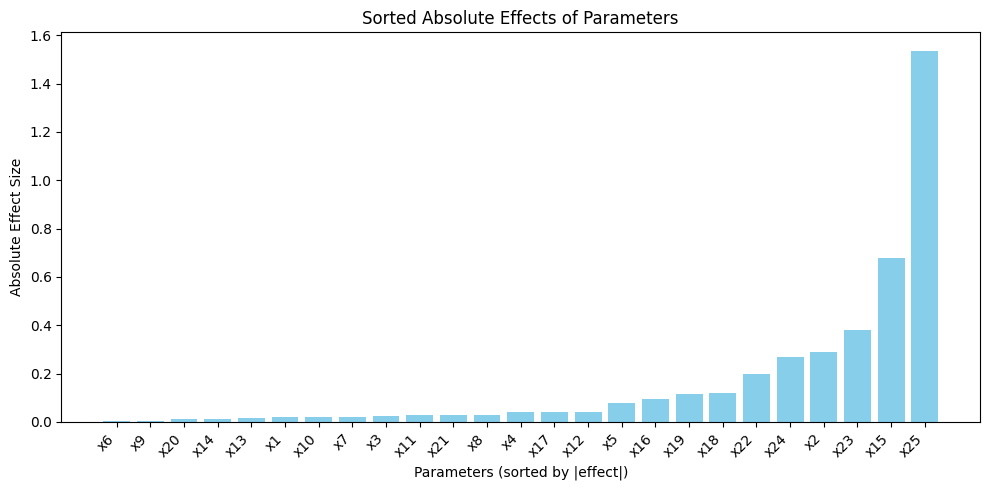

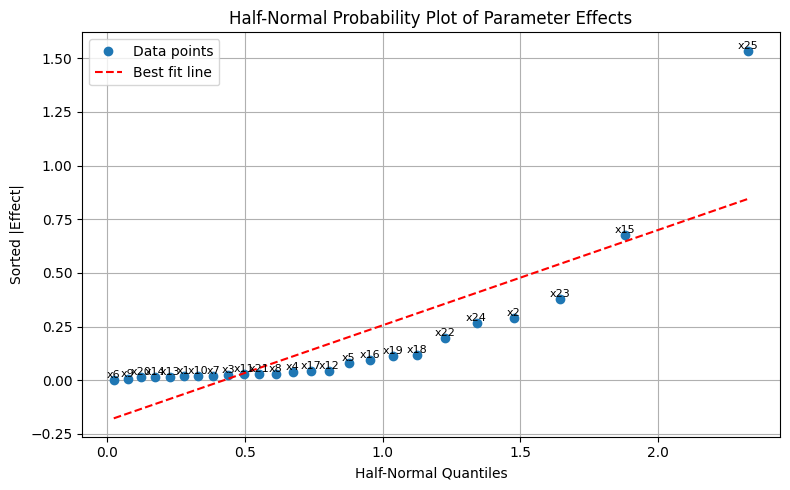

In [15]:
from scipy.stats import norm
def plot_effects(effects):
    """
    Given a dict 'effects': param_name -> effect_value,
    produce two plots:
      1) Bar chart of absolute effects sorted in ascending order.
      2) Half-normal probability plot of absolute effects with parameter annotations.
    """
    # Sort effects by absolute value (ascending)
    sorted_pairs = sorted(effects.items(), key=lambda x: abs(x[1]))
    params_sorted = [p for (p, e) in sorted_pairs]
    effects_sorted = [e for (p, e) in sorted_pairs]
    abs_effects_sorted = [abs(e) for e in effects_sorted]
    
    # Plot bar chart.
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(params_sorted)), abs_effects_sorted, color='skyblue')
    plt.xticks(range(len(params_sorted)), params_sorted, rotation=45, ha='right')
    plt.xlabel('Parameters (sorted by |effect|)')
    plt.ylabel('Absolute Effect Size')
    plt.title('Sorted Absolute Effects of Parameters')
    plt.tight_layout()
    plt.show()
    
    # Plot half-normal probability plot.
    P = len(abs_effects_sorted)
    xvals = []
    for i in range(P):
        alpha = (i + 0.5) / P
        xval = norm.ppf(0.5 + 0.5 * alpha)
        xvals.append(xval)
    xvals = np.array(xvals)
    yvals = np.array(abs_effects_sorted)
    
    plt.figure(figsize=(8, 5))
    plt.plot(xvals, yvals, 'o', label='Data points')
    # Annotate each point with its corresponding parameter.
    for xi, yi, param in zip(xvals, yvals, params_sorted):
        plt.text(xi, yi, param, fontsize=8, ha='center', va='bottom')
    
    # Fit a reference line.
    A_mat = np.vstack([xvals, np.ones(len(xvals))]).T
    slope, intercept = np.linalg.lstsq(A_mat, yvals, rcond=None)[0]
    y_fit = slope * xvals + intercept
    plt.plot(xvals, y_fit, 'r--', label='Best fit line')
    
    plt.xlabel('Half-Normal Quantiles')
    plt.ylabel('Sorted |Effect|')
    plt.title('Half-Normal Probability Plot of Parameter Effects')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_effects(effects)

In [16]:
# The important variables we wish to design over:
important_vars = ['x25', 'x15', 'x23', 'x2', 'x24', 'x22', 'x18', 'x19', 'x16', 'x5']
p_levels = get_parameters_WT_levels()
# Create a dictionary with the bounds only for the important variables.
domains = {var: p_levels[var] for var in important_vars}

# -----------------------------------------------------------------------------
# LHS with maximin criterion functions
# -----------------------------------------------------------------------------

def generate_lhs(n, p):
    """
    Generates an n x p Latin Hypercube Sample in [0, 1]^p.
    Each column is a random permutation of the n equally spaced intervals.
    Returns an array of shape (n, p).
    """
    lhs = np.zeros((n, p))
    for j in range(p):
        perm = np.random.permutation(n) + 1  # integers 1...n in random order
        # Convert each integer to a point in its interval: (perm - 0.5) / n
        lhs[:, j] = (perm - 0.5) / n
    return lhs

def min_distance(design):
    """
    Computes the minimum Euclidean distance between any two rows (design points) in the design array.
    """
    n = design.shape[0]
    min_d = np.inf
    for i in range(n-1):
        for j in range(i+1, n):
            d = np.linalg.norm(design[i, :] - design[j, :])
            if d < min_d:
                min_d = d
    return min_d

def lhs_maximin(n, p, n_iter=1000):
    """
    Generates n design points in p dimensions using Latin Hypercube Sampling (LHS) repeated
    n_iter times, and returns the design with the maximum minimum distance (maximin criterion).
    
    Returns:
      best_design: array of shape (n, p) in [0,1].
    """
    best_design = None
    best_min_dist = -np.inf
    for i in range(n_iter):
        design = generate_lhs(n, p)
        d = min_distance(design)
        if d > best_min_dist:
            best_min_dist = d
            best_design = design
    return best_design

# -----------------------------------------------------------------------------
# Rescaling design points to actual domains
# -----------------------------------------------------------------------------

def rescale_design(design, domains):
    """
    Rescales an LHS design (points in [0, 1]^p) to the actual domains provided.
    
    Parameters:
      design: array of shape (n, p) with values in [0, 1].
      domains: dictionary mapping variable names to (low, high).
               The order of variables is assumed to follow sorted(domains.keys()).
    
    Returns:
      rescaled: array of shape (n, p) with values in the actual domains.
    """
    # Ensure consistent ordering
    var_names = sorted(domains.keys(), key=lambda x: important_vars.index(x))
    n, p = design.shape
    rescaled = np.zeros_like(design)
    for j, var in enumerate(var_names):
        low, high = domains[var]
        rescaled[:, j] = low + (high - low) * design[:, j]
    return rescaled, var_names



Best LHS design in normalized space (first 5 points):
[[0.305 0.175 0.975 0.445 0.475 0.455 0.915 0.545 0.045 0.395]
 [0.895 0.035 0.635 0.935 0.035 0.795 0.265 0.785 0.315 0.965]
 [0.855 0.955 0.695 0.605 0.775 0.805 0.055 0.915 0.975 0.595]
 [0.165 0.405 0.085 0.005 0.955 0.935 0.045 0.715 0.705 0.355]
 [0.545 0.005 0.985 0.475 0.085 0.685 0.175 0.315 0.985 0.095]]

Rescaled design points (first 5 rows):
Point 1: x25=6.0945, x15=19.3666, x23=10.7613, x2=22.3592, x24=7.0691, x22=12.6704, x18=0.4748, x19=4559.9620, x16=0.0076, x5=27.7865
Point 2: x25=10.5613, x15=15.3498, x23=8.2807, x2=33.9528, x24=3.8790, x22=17.1813, x18=0.2567, x19=5607.2260, x16=0.0113, x5=45.4830
Point 3: x25=10.2584, x15=41.7457, x23=8.7185, x2=26.1449, x24=9.2443, x22=17.3140, x18=0.1862, x19=6174.4940, x16=0.0205, x5=33.9958
Point 4: x25=5.0346, x15=25.9655, x23=4.2680, x2=11.9486, x24=10.5493, x22=19.0387, x18=0.1829, x19=5301.7740, x16=0.0167, x5=26.5447
Point 5: x25=7.9115, x15=14.4891, x23=10.8343, x2=23.0

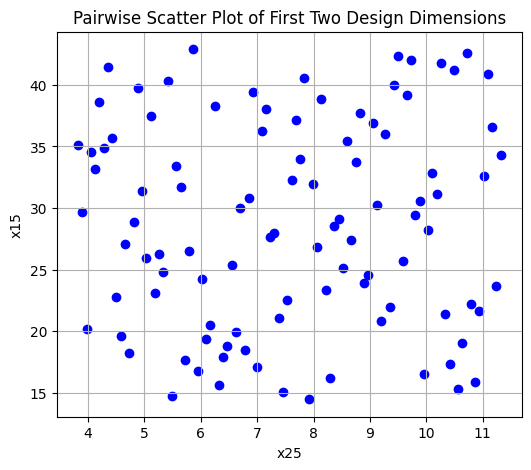

In [17]:
# -----------------------------------------------------------------------------
# Main routine: Generate LHS with maximin criterion and rescale to actual domains.
# -----------------------------------------------------------------------------

# Number of design points and number of variables (p = 10 for our important variables)
n_design = 100  # you may change this value
p = len(important_vars)

# Number of LHS iterations
n_iter = 1000

# Generate best LHS design using maximin criterion.
best_design = lhs_maximin(n_design, p, n_iter=n_iter)
print("Best LHS design in normalized space (first 5 points):")
print(best_design[:5, :])

# Rescale the design to the actual domains of the important variables.
rescaled_design, var_names_ordered = rescale_design(best_design, domains)
print("\nRescaled design points (first 5 rows):")
for i in range(min(5, n_design)):
    point_str = ", ".join([f"{var}={rescaled_design[i, j]:.4f}" for j, var in enumerate(var_names_ordered)])
    print(f"Point {i+1}: {point_str}")

# Optionally, plot the design in a pairwise scatter plot for visualization.
# Here, we simply plot the first two dimensions as an example.
plt.figure(figsize=(6, 5))
plt.scatter(rescaled_design[:, 0], rescaled_design[:, 1], c='b', marker='o')
plt.xlabel(var_names_ordered[0])
plt.ylabel(var_names_ordered[1])
plt.title('Pairwise Scatter Plot of First Two Design Dimensions')
plt.grid(True)
plt.show()

In [219]:
# Assume the following variables are already defined from your previous LHS code:
#   rescaled_design : array of shape (n_design, p) for important variables
#   var_names_ordered : list of the 10 important variable names in order
#   n_design : number of design points (e.g., 100)
#   important_vars: same as var_names_ordered

# Define the voltage range over which the discrepancy is computed.
voltages = np.arange(-140, -20 + 1, 10)

# Get the nominal WT parameter set.
p_nominal = get_parameters_WT()

# Prepare a list to store results.
results = []

# Loop over each design point.
for i in range(n_design):
    # Start with a copy of the nominal parameter set.
    candidate = get_parameters_WT().copy()
    
    # Override the important variables with the candidate values from the design.
    for j, var in enumerate(var_names_ordered):
        candidate[var] = rescaled_design[i, j]
    
    # Compute the discrepancy between candidate and nominal over the voltage range.
    disc = compute_discrepancy(candidate, p_nominal, voltages)
    
    # Record only the important variable values and the discrepancy.
    rec = {var: candidate[var] for var in var_names_ordered}
    rec['discrepancy'] = disc
    results.append(rec)

In [221]:
len(results)

100

In [ ]:
# till here!

Voltage = -140 mV
Final (steady-state) distribution (normalized):
[4.60859622e-01 1.41117244e-01 1.71163924e-01 3.24650477e-02
 2.48411860e-06 1.45371157e-01 2.16517157e-02 1.77181827e-02
 9.65062236e-03]
Sum = 1.0000000000000002 



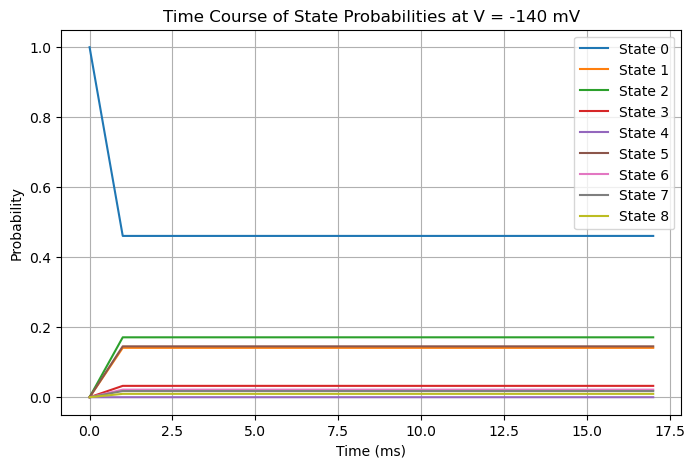

Voltage = -130 mV
Final (steady-state) distribution (normalized):
[5.04024441e-01 1.38160190e-01 1.66387936e-01 5.52315922e-02
 4.19699653e-06 8.16338018e-02 2.15285346e-02 2.07109551e-02
 1.23183519e-02]
Sum = 1.0 



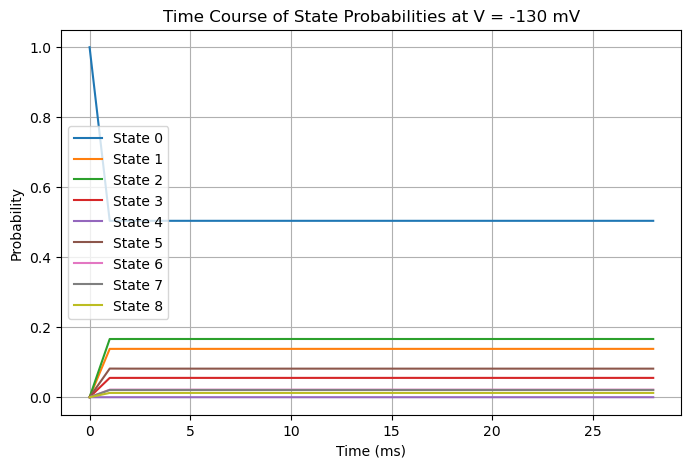

Voltage = -120 mV
Final (steady-state) distribution (normalized):
[5.04425564e-01 1.29655120e-01 1.55005572e-01 8.93247074e-02
 6.67321637e-06 5.65384942e-02 2.46359569e-02 2.50854012e-02
 1.53225117e-02]
Sum = 1.0 



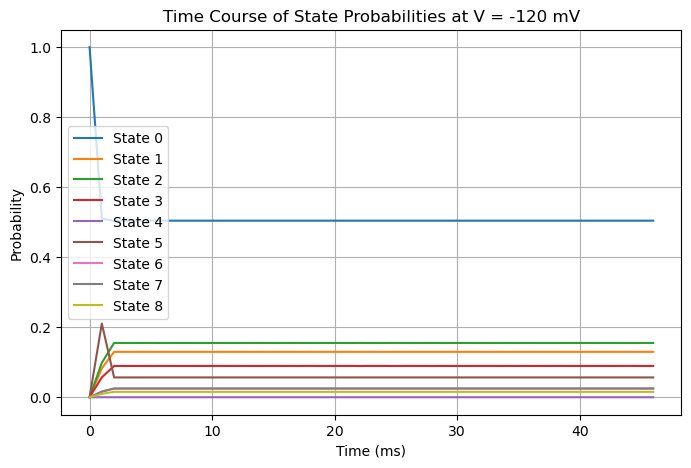

Voltage = -110 mV
Final (steady-state) distribution (normalized):
[4.80776384e-01 1.16336067e-01 1.37204392e-01 1.34910152e-01
 9.74512655e-06 5.23905786e-02 2.97097385e-02 3.02324938e-02
 1.84304490e-02]
Sum = 1.0 



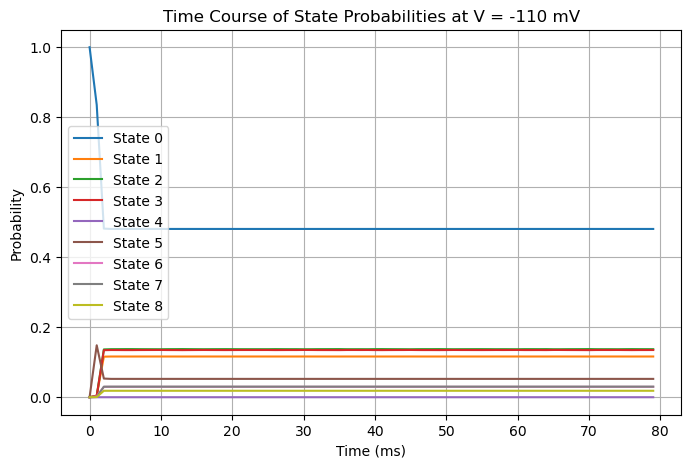

Voltage = -100 mV
Final (steady-state) distribution (normalized):
[4.43815583e-01 1.00477008e-01 1.15611851e-01 1.87495335e-01
 1.26897917e-05 5.90084346e-02 3.64311916e-02 3.57101757e-02
 2.14377317e-02]
Sum = 1.0 



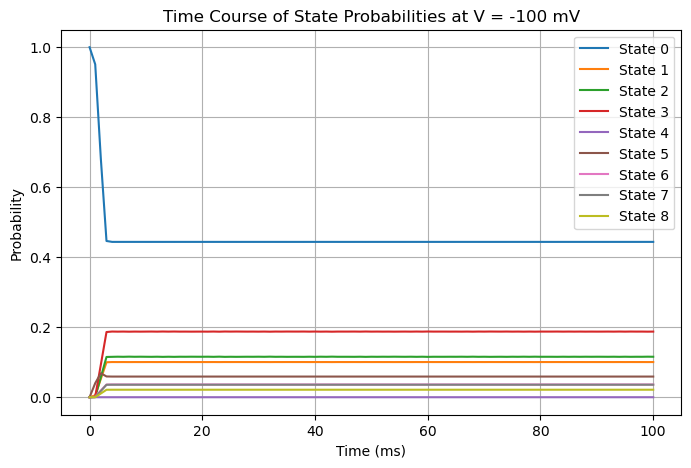

Voltage = -90 mV
Final (steady-state) distribution (normalized):
[3.94108109e-01 8.72478491e-02 9.59228535e-02 2.41095526e-01
 1.43412775e-05 6.87125057e-02 4.58209703e-02 4.20583416e-02
 2.50195032e-02]
Sum = 0.9999999999999999 



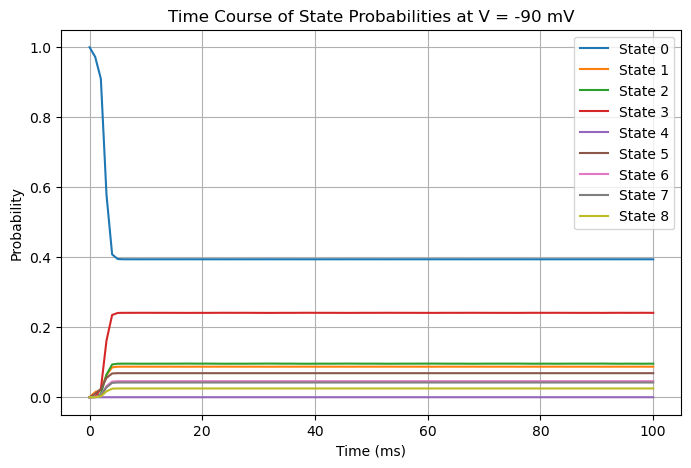

Voltage = -80 mV
Final (steady-state) distribution (normalized):
[3.18013345e-01 8.50967560e-02 8.87863307e-02 2.93618927e-01
 1.30438972e-05 6.66188312e-02 6.01140731e-02 5.39130851e-02
 3.38256084e-02]
Sum = 1.0 



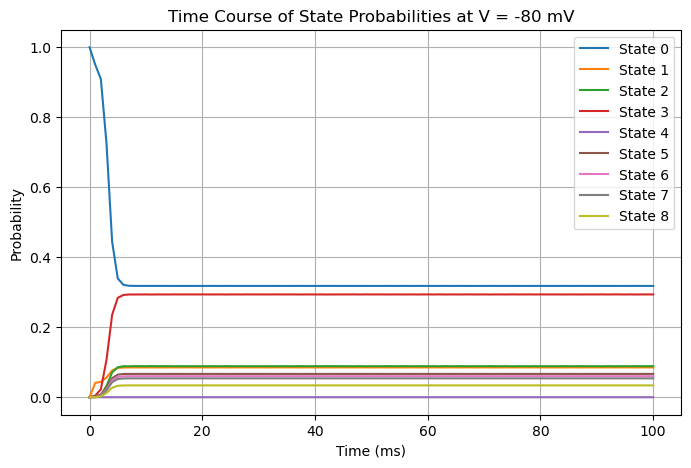

Voltage = -70 mV
Final (steady-state) distribution (normalized):
[2.16828461e-01 1.01572313e-01 1.12321293e-01 3.17916772e-01
 6.84858184e-06 3.96486842e-02 6.86383949e-02 7.90320019e-02
 6.40352321e-02]
Sum = 1.0 



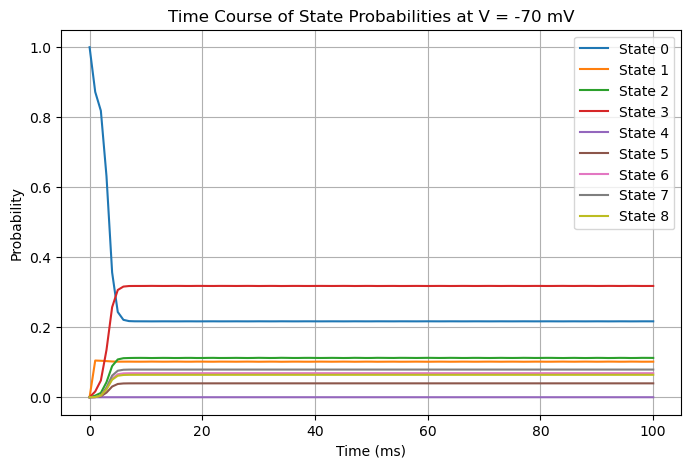

Voltage = -60 mV
Final (steady-state) distribution (normalized):
[1.30355949e-01 1.23822860e-01 1.72873125e-01 2.74827404e-01
 1.88572689e-06 1.36245726e-02 5.12739300e-02 9.81657070e-02
 1.35054567e-01]
Sum = 1.0000000000000002 



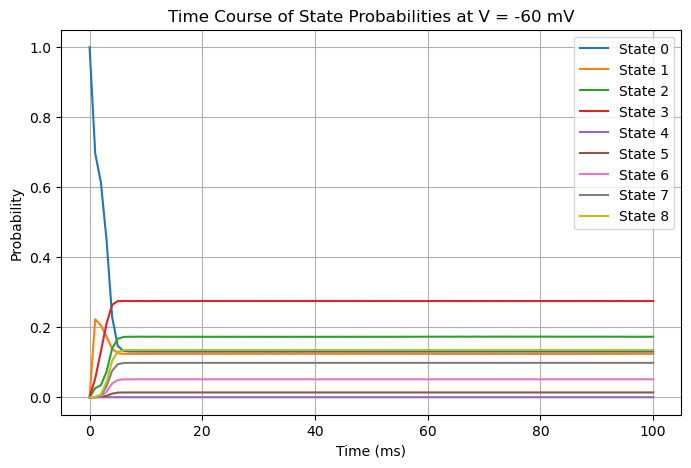

Voltage = -50 mV
Final (steady-state) distribution (normalized):
[6.60521786e-02 1.23243445e-01 2.42826606e-01 2.14017541e-01
 4.61536271e-07 3.12778495e-03 2.49681115e-02 8.65192826e-02
 2.39244590e-01]
Sum = 1.0000000000000002 



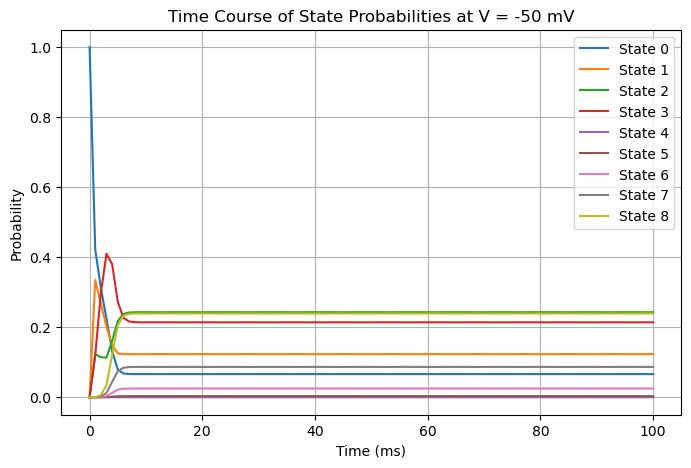

Voltage = -40 mV
Final (steady-state) distribution (normalized):
[2.46413737e-02 9.18379467e-02 3.00405249e-01 1.67961884e-01
 1.30340146e-07 5.07556179e-04 8.55306033e-03 5.86600376e-02
 3.47432762e-01]
Sum = 1.0 



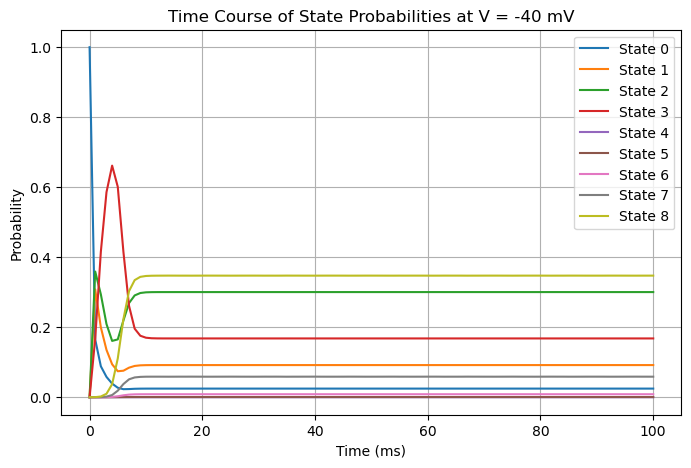

Voltage = -30 mV
Final (steady-state) distribution (normalized):
[6.29941482e-03 5.01342282e-02 3.32950393e-01 1.31141110e-01
 4.06608441e-08 6.66765739e-05 2.38774447e-03 3.56346584e-02
 4.41385733e-01]
Sum = 1.0 



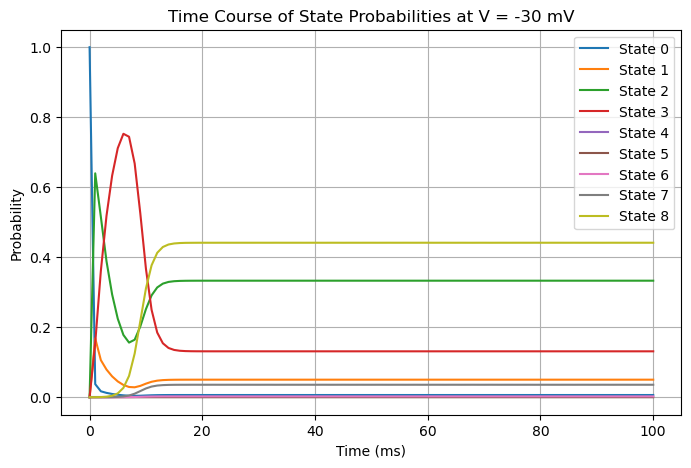

Voltage = -20 mV
Final (steady-state) distribution (normalized):
[1.27233406e-03 2.24032405e-02 3.34259845e-01 9.75150369e-02
 1.27008551e-08 8.58253073e-06 6.44685185e-04 2.14354233e-02
 5.22460840e-01]
Sum = 1.0000000000000002 



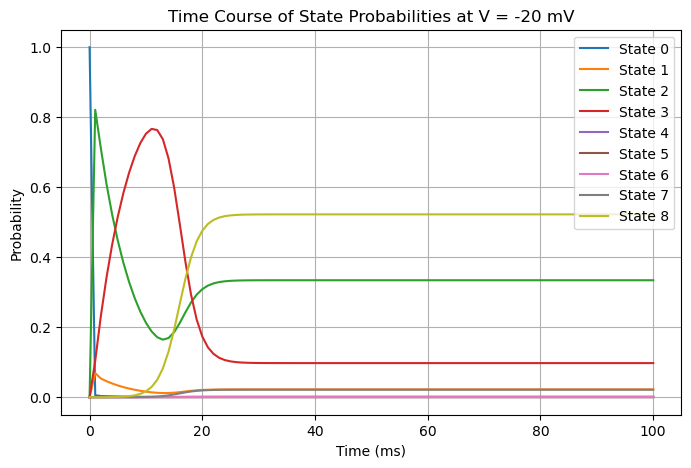

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_rhs(t, P, V, param_dict):
    # Build transition rates and then generator matrix A for the given voltage V.
    rates = get_transition_rates(V, param_dict)
    A = build_generator_matrix(rates)
    return A.dot(P)

def solve_markov_ode(V, param_dict, P0, t_span, t_eval):
    """
    Solve dP/dt = A(V)*P(t) for a fixed voltage V,
    and re-normalize P so that the sum of state probabilities is 1.
    
    Parameters:
      V         : constant voltage (in mV)
      param_dict: parameter dictionary (e.g., from get_parameters_WT())
      P0        : initial state probability vector (length 9)
      t_span    : tuple (t_start, t_end)
      t_eval    : array of time points for evaluation
      
    Returns:
      t         : time array
      P         : solution array, shape (len(t_eval), 9), with each row summing to 1.
    """
    sol = solve_ivp(fun=lambda t, y: ode_rhs(t, y, V, param_dict),
                    t_span=t_span, y0=P0, t_eval=t_eval, method='RK45')
    
    # The solver returns an array of shape (9, len(t_eval)); transpose it.
    P_sol = sol.y.T
    
    # Normalize each state vector to sum to 1.
    P_sol = P_sol / np.sum(P_sol, axis=1, keepdims=True)
    return sol.t, P_sol

# Example usage:
if __name__ == '__main__':
    # Get the parameter set for WT (or KO) condition.
    p_WT = get_parameters_WT()
    
    # Define the range of voltages: from -140 mV to -20 mV in steps of 10 mV.
    voltages = np.arange(-140, -20 + 1, 10)  # -140, -130, ..., -20
    
    # Define the initial condition.
    # For example, suppose all channels are initially in state 0.
    P0 = np.zeros(9)
    P0[0] = 1.0  # all channels start in state 0
    
    # Define the time span and evaluation points (e.g., 0 to 100 ms).
    t_span = (0, 100)  # in ms
    t_eval = np.linspace(0, 100, 101)  # evaluation every 1 ms

    for V in voltages:
        t, P = solve_markov_ode(V, p_WT, P0, t_span, t_eval)
        print(f"Voltage = {V} mV")
        print("Final (steady-state) distribution (normalized):")
        print(P[-1])
        print("Sum =", P[-1].sum(), "\n")
        
        # Plot the time course for each state.
        plt.figure(figsize=(8, 5))
        for state in range(P.shape[1]):
            plt.plot(t, P[:, state], label=f"State {state}")
        plt.title(f"Time Course of State Probabilities at V = {V} mV")
        plt.xlabel("Time (ms)")
        plt.ylabel("Probability")
        plt.legend()
        plt.grid(True)
        plt.show()


V = -140 mV, SSA = 0.010, SSI = 0.806
V = -130 mV, SSA = 0.012, SSI = 0.864
V = -120 mV, SSA = 0.015, SSI = 0.878
V = -110 mV, SSA = 0.018, SSI = 0.869
V = -100 mV, SSA = 0.021, SSI = 0.847
V = -90 mV, SSA = 0.025, SSI = 0.818
V = -80 mV, SSA = 0.034, SSI = 0.786
V = -70 mV, SSA = 0.064, SSI = 0.749
V = -60 mV, SSA = 0.135, SSI = 0.702
V = -50 mV, SSA = 0.239, SSI = 0.646
V = -40 mV, SSA = 0.347, SSI = 0.585
V = -30 mV, SSA = 0.441, SSI = 0.521
V = -20 mV, SSA = 0.522, SSI = 0.455


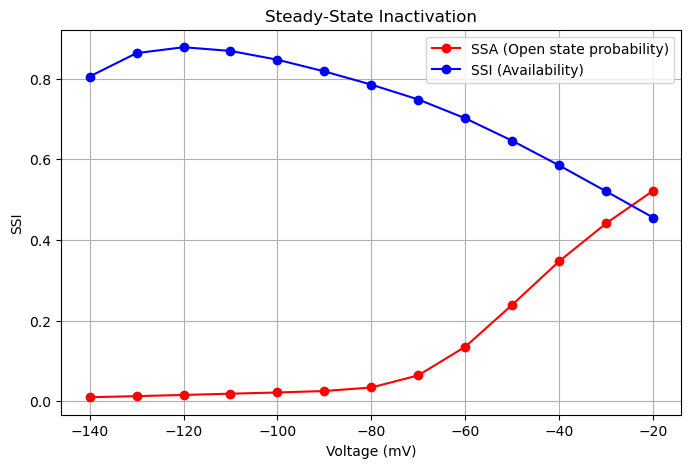

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_rhs(t, P, V, param_dict):
    """
    Compute dP/dt = A(V)*P(t) for the given constant voltage V.
    """
    rates = get_transition_rates(V, param_dict)
    A = build_generator_matrix(rates)
    return A.dot(P)

def solve_markov_ode(V, param_dict, P0, t_span, t_eval):
    """
    Solve dP/dt = A(V)*P(t) for a fixed voltage V over time.
    After integration, normalize P(t) at each time so that sum(P)=1.
    
    Parameters:
      V         : the constant voltage (mV)
      param_dict: parameter dictionary (e.g., from get_parameters_WT())
      P0        : initial state probability vector (length 9)
      t_span    : tuple (t_start, t_end) in ms
      t_eval    : array of time points for evaluation
      
    Returns:
      t         : time array
      P_sol     : solution array, shape (len(t_eval), 9), normalized.
    """
    sol = solve_ivp(fun=lambda t, y: ode_rhs(t, y, V, param_dict),
                    t_span=t_span, y0=P0, t_eval=t_eval, method='RK45')
    
    # sol.y is (9, len(t_eval)); transpose so each row is one time point.
    P_sol = sol.y.T
    # Normalize each state vector so that its components sum to 1.
    P_sol = P_sol / np.sum(P_sol, axis=1, keepdims=True)
    return sol.t, P_sol

# Main block: loop over voltages, record final state distributions, and plot SSA and SSI.
if __name__ == '__main__':
    # Use your function to get the parameter set (for example, for wild-type)
    p_WT = get_parameters_WT()
    
    # Define the voltage range: from -140 mV to -20 mV in 10 mV steps.
    voltages = np.arange(-140, -20 + 1, 10)
    
    # Define the initial state vector.
    # For example, assume all channels start in state 0 (IC3).
    P0 = np.zeros(9)
    P0[0] = 1.0  # all channels in state 0 initially
    
    # Define the time span and evaluation points (0 to 100 ms, sampled every 1 ms).
    t_span = (0, 100)  # ms
    t_eval = np.linspace(0, 100, 101)
    
    # Prepare lists to store the final (steady-state) SSA and SSI values.
    SSA_vals = []  # steady-state activation (open state probability)
    SSI_vals = []  # steady-state inactivation, defined as 1 - (sum of states 0-4)
    
    # Loop over voltages.
    for V in voltages:
        t, P_sol = solve_markov_ode(V, p_WT, P0, t_span, t_eval)
        final_P = P_sol[-1]  # use the last time point as steady state
        
        # SSA: fraction of channels in the open state (state index 8)
        SSA = final_P[8]
        # SSI: fraction available = 1 - (sum of inactivated states, indices 0 to 4)
        SSI =  np.sum(final_P[:5])
        
        SSA_vals.append(SSA)
        SSI_vals.append(SSI)
        print(f"V = {V} mV, SSA = {SSA:.3f}, SSI = {SSI:.3f}")
    
    # Convert lists to numpy arrays for plotting.
    SSA_vals = np.array(SSA_vals)
    SSI_vals = np.array(SSI_vals)
    
    # Plot steady-state activation (SSA) vs. voltage.
    plt.figure(figsize=(8, 5))
    plt.plot(voltages, SSA_vals, 'r-o', label='SSA (Open state probability)')
    plt.xlabel("Voltage (mV)")
    plt.ylabel("SSA")
    plt.title("Steady-State Activation")
    plt.legend()
    plt.grid(True)
    
    # Plot steady-state inactivation (SSI) vs. voltage.
    plt.plot(voltages, SSI_vals, 'b-o', label='SSI (Availability)')
    plt.xlabel("Voltage (mV)")
    plt.ylabel("SSI")
    plt.title("Steady-State Inactivation")
    plt.legend()
    plt.grid(True)
    plt.show()
